In [110]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?
- These are websites that always relevant like recipies or reviews (as opposed to current events)
- Look at some examples

In [143]:
data = pd.read_csv('../../assets/datasets/train.tsv', sep='\t', na_values='?')

# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [144]:
data[['title', 'label']].head()

,title,label
0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",0
1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",1
2,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,1
3,10 Foolproof Tips for Better Sleep,1
4,The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen,0


#### Build a feature matrix where X contains useful features and y contains the target variable `label`

In [145]:
# TODO
print data.info()
print data.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  5053 non-null object
alchemy_category_score            5053 non-null float64
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_

In [146]:
from sklearn import preprocessing

features = data.drop(['title', 'body', 'alchemy_category','boilerplate', 'urlid', 'url'], axis=1)
features = features.drop('alchemy_category_score', axis = 1)
features['is_news'] = features['is_news'].fillna(0)
features['news_front_page'] = features['news_front_page'].fillna(0)

In [147]:
features.head()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1.0,1,24,0.0,5424,170,8,0.152941,0.079130,0
1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1.0,1,40,0.0,4973,187,9,0.181818,0.125448,1
2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1.0,1,55,0.0,2240,258,11,0.166667,0.057613,1
3,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1.0,0,24,0.0,2737,120,5,0.041667,0.100858,1
4,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1.0,1,14,0.0,12032,162,10,0.098765,0.082569,0


In [148]:
target = data['label']

In [158]:
data = preprocessing.normalize(features)
data = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 22 columns):
0     7395 non-null float64
1     7395 non-null float64
2     7395 non-null float64
3     7395 non-null float64
4     7395 non-null float64
5     7395 non-null float64
6     7395 non-null float64
7     7395 non-null float64
8     7395 non-null float64
9     7395 non-null float64
10    7395 non-null float64
11    7395 non-null float64
12    7395 non-null float64
13    7395 non-null float64
14    7395 non-null float64
15    7395 non-null float64
16    7395 non-null float64
17    7395 non-null float64
18    7395 non-null float64
19    7395 non-null float64
20    7395 non-null float64
21    7395 non-null float64
dtypes: float64(22)
memory usage: 1.2 MB


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [205]:
features

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.000000,0,0.090774,0,0.245831,0.003883,1.0,1,24,0.0,5424,170,8,0.152941,0.079130,0
1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.000000,0,0.098707,0,0.203490,0.088652,1.0,1,40,0.0,4973,187,9,0.181818,0.125448,1
2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.000000,0,0.072448,0,0.226402,0.120536,1.0,1,55,0.0,2240,258,11,0.166667,0.057613,1
3,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.000000,0,0.095861,0,0.265656,0.035343,1.0,0,24,0.0,2737,120,5,0.041667,0.100858,1
4,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.000000,0,0.024908,0,0.228887,0.050473,1.0,1,14,0.0,12032,162,10,0.098765,0.082569,0
5,119.000000,0.745455,0.581818,0.290909,0.018182,0.434639,0.000000,0,0.019841,0,0.298300,0.038636,0.0,0,12,0.0,4368,55,3,0.054545,0.087356,0
6,0.773810,0.215054,0.053763,0.043011,0.043011,0.579596,0.000000,0,0.039568,0,0.218978,0.311377,1.0,0,21,0.0,1287,93,3,0.548387,0.064327,1
7,1.883333,0.719697,0.265152,0.113636,0.015152,0.499348,0.000000,0,0.026616,0,0.173746,0.025830,0.0,0,5,0.0,27656,132,4,0.068182,0.148551,0
8,0.471503,0.190722,0.036082,0.000000,0.000000,0.383199,0.000000,0,0.021705,0,0.114962,1.136646,1.0,0,17,0.0,2471,194,7,0.644330,0.125000,1
9,2.410112,0.469325,0.101227,0.018405,0.003067,0.465859,0.000000,0,0.012000,0,0.205117,0.206262,0.0,1,14,0.0,11459,326,4,0.236196,0.094412,1


In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.33, random_state=10)

In [188]:
logreg = LogisticRegression(random_state=10)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [189]:
Y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [190]:
confusionmatrix = np.array(confusion_matrix(Y_test, Y_pred, labels=[1,0]))
confusionmatrix = pd.DataFrame(confusionmatrix, index=['Is_green', 'Not_green'],
                              columns=['Predict_Green', 'Predict_Not_Green'])
confusionmatrix

,Predict_Green,Predict_Not_Green
Is_green,1254,0
Not_green,0,1187


In [191]:
accuracy_score(Y_test, Ypred)

1.0

#### Build a Logistic Regression model using scikit-learn
- Examine the coefficients using the `examine_coefficients` function provided
- Evaluate the AUC, precision and recall of the model using cross-validation (hint:use scoring parameter in cross_val_score
- Plot the ROC curve
- Iterate on the model by adding in additional features in `X` above

In [192]:
def examine_coefficients(model, df):
    return pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')

In [194]:
# TODO
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

acc = accuracy_score(Y_test, Y_pred)
print "Accuracy: ", acc
recall = recall_score(Y_test, Y_pred)
print "Recall: ", recall
prec = precision_score(Y_test, Y_pred)
print "Precision: ", prec

Accuracy:  1.0
Recall:  1.0
Precision:  1.0


In [196]:
examine_coefficients(logreg, features)

,Coefficient,Feature
10,-0.479340,html_ratio
12,-0.356922,is_news
19,-0.288296,parametrizedLinkRatio
15,-0.238162,news_front_page
20,-0.223263,spelling_errors_ratio
8,-0.174533,frameTagRatio
13,-0.108352,lengthyLinkDomain
1,-0.102358,commonlinkratio_1
18,-0.073189,numwords_in_url
14,-0.026643,linkwordscore


In [200]:
Y_proba_score = logreg.predict_proba(X_test)

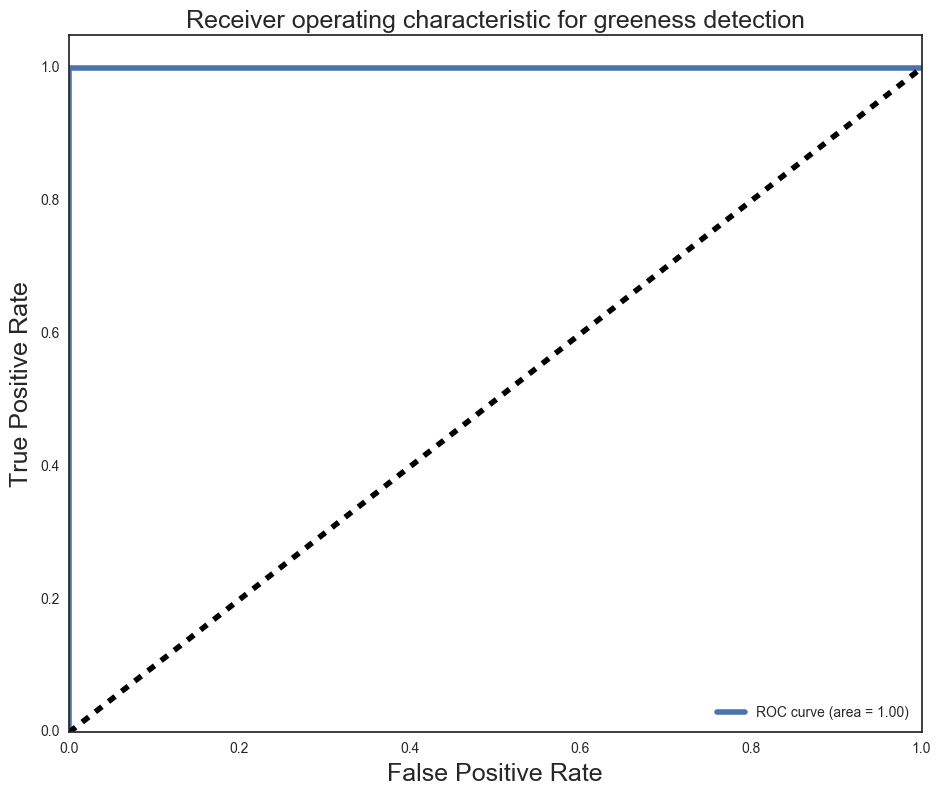

In [203]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-white')

FPR, TPR, thresholds = roc_curve(Y_test, Y_proba_score[:,1])
#can also do this:FPR, TPR, thresholds = roc_curve(Y_test, Y_score)

ROC_AUC = auc(FPR, TPR)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for greeness detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
### I cannot for the life of me figure out why this model has over fit.